### In this notebook, we create split Deep Neural Networks for Genre prediction using both Audio and Theme features
### The initial network would be split in two with each split working on either the Audio or the Theme features and then getting combined before the Output layer

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


Load the data and verify the shape

In [2]:
musicFeatures = pd.read_pickle("./musicFeatures_med_250/musicFeatures.pkl")  

In [3]:
print(f"shape of dataset: {musicFeatures.shape}\n")

musicFeatures.head(3)

shape of dataset: (26900, 22)



,id,genre,mfccFeature_0,mfccFeature_1,mfccFeature_2,mfccFeature_3,mfccFeature_4,mfccFeature_5,mfccFeature_6,mfccFeature_7,...,mfccFeature_10,mfccFeature_11,mfccFeature_12,mfccFeature_13,mfccFeature_14,themeFeature_0,themeFeature_1,themeFeature_2,themeFeature_3,themeFeature_4
0,124425_0,Folk,"[-367.4169, -240.58614, -193.78488, -180.29262...","[163.79123, 170.1294, 171.51189, 161.30435, 14...","[6.0959854, -5.9718704, -3.6486344, -1.2554941...","[53.194122, 63.06723, 60.13885, 54.763412, 52....","[16.68528, 19.538809, 19.626118, 18.60508, 23....","[-23.51472, -19.84507, -16.962742, -13.548637,...","[6.3363132, -1.276854, -5.610017, -4.050003, -...","[-20.14743, -24.12778, -16.919537, -7.6289234,...",...,"[3.951639, -4.166794, -8.241913, -9.794014, -1...","[5.920375, 9.249519, 8.353765, 11.909894, 14.4...","[-12.381685, -16.062777, -16.373697, -15.77498...","[-3.8526406, -3.5650363, -4.6753526, -5.407305...","[-4.4005404, -11.534243, -12.7789135, -14.0914...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."
1,124425_1,Folk,"[-176.67264, -169.07156, -142.83098, -116.0994...","[125.95861, 142.0693, 138.62712, 128.68915, 12...","[-42.819057, -54.282654, -64.97652, -73.68849,...","[68.79902, 82.17572, 71.34984, 73.27362, 84.63...","[15.051884, 15.13154, 15.273981, 14.384039, 15...","[-5.963161, -10.348415, -12.421081, -9.166971,...","[18.740742, 19.350863, 8.707056, 3.6187146, 1....","[-11.269847, -7.254199, 1.2921772, -1.4600475,...",...,"[-5.3846745, -10.779312, -19.985872, -18.81395...","[12.694374, 11.362453, 8.072839, 4.8536325, -0...","[3.3793998, -0.6741159, -0.14108896, -5.083455...","[-19.578459, -20.371014, -11.236882, -7.421087...","[-8.606797, -10.857103, -13.955954, -13.888264...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."
2,124425_2,Folk,"[-112.90256, -84.587326, -92.53052, -99.84867,...","[118.598724, 102.67175, 82.80994, 73.35031, 71...","[-33.237568, -38.343197, -34.45424, -24.077305...","[50.234768, 52.99376, 56.314552, 51.52988, 53....","[18.136402, 22.863585, 18.818027, 11.438265, 8...","[-23.589928, -19.38637, -15.253525, -5.8537474...","[11.365215, 6.558339, -1.7250502, -4.8964157, ...","[-8.613762, -10.419959, -4.151663, -1.5471857,...",...,"[-19.939487, -16.535833, -21.92295, -25.605438...","[12.999569, 8.9071, 3.3847241, 5.747637, 2.470...","[-5.4092526, -7.6361217, -13.698164, -13.45112...","[-0.42731082, -2.8598223, -1.4495995, 1.697975...","[-14.1753845, -20.045826, -20.387835, -21.9254...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."


In [4]:
"""
Verifying all shapres and types of data
"""
print(musicFeatures.shape)
print('MFCC Features \n')
print(type(musicFeatures['mfccFeature_0'].iloc[0]))
print(len(musicFeatures['mfccFeature_0'].iloc[0]))
print(type(musicFeatures['mfccFeature_0'].iloc[0][0]))

print('Theme Features \n')
print(type(musicFeatures['themeFeature_0'].iloc[0]))
print(musicFeatures['themeFeature_0'].iloc[0].size)
print(type(musicFeatures['themeFeature_0'].iloc[0][0]))



(26900, 22)
MFCC Features 

<class 'numpy.ndarray'>
250
<class 'numpy.float64'>
Theme Features 

<class 'numpy.ndarray'>
250
<class 'numpy.float64'>



Split data in X and y datasets and dropping 'id' from the X dataset

In [5]:
#Spliting x and y

y = musicFeatures['genre']
x = musicFeatures.loc[:, musicFeatures.columns != 'genre']
x = x.drop(['id'],axis =1)

print(x.shape)
print(y.shape)

(26900, 20)
(26900,)


The convertTo3DnpArray() function in the cell below is used to reshape the data. 

The data is currently in tabular form where each cell is 250 length numpy vector. We're reshaping the data from 4 dimensions to 3 dimensions for our use case.

In [6]:
def convertTo3DnpArray(df):
    new = []

    for index, row in df.iterrows():
        temp = []
        for i in row:
            temp.append(i)
        temp = np.stack(temp, axis=1)
        new.append(temp)
    new = np.stack(new, axis=0)
    
    return new

We split the dataset into train,test and valid which is of the ratio 80:10:10. Each model is trained on train and tested on test, once the best model is identified, we do a final validation on valid dataset.

In [7]:
#Train test valid split

x_train_temp, x_valid, y_train_temp, y_valid = train_test_split(x,y,test_size=0.1,random_state=12,stratify=y)
x_train, x_test, y_train, y_test = train_test_split(x_train_temp,y_train_temp,test_size=0.1/0.9,random_state=12,stratify=y_train_temp)

print('Final Sizes of all datasets')
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('x_valid :',x_valid.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)
print(' \n')

print('Value counts ')
print('y_train :')
print(y_train.value_counts())
print('y_test :')
print(y_test.value_counts())
print('y_valid :')
print(y_valid.value_counts())




Final Sizes of all datasets
x_train : (21520, 20)
x_test : (2690, 20)
x_valid : (2690, 20)
y_train : (21520,)
y_test : (2690,)
y_valid : (2690,)
 

Value counts 
y_train :
Rock            3820
Hip-Hop         3304
Experimental    3228
Folk            3224
Electronic      3192
Pop             2428
Instrumental    2324
Name: genre, dtype: int64
y_test :
Rock            477
Hip-Hop         413
Experimental    404
Folk            403
Electronic      399
Pop             303
Instrumental    291
Name: genre, dtype: int64
y_valid :
Rock            478
Hip-Hop         413
Folk            403
Experimental    403
Electronic      399
Pop             304
Instrumental    290
Name: genre, dtype: int64



Calling the convertTo3DnpArray() function to convert the X datasets to 3D numpy arrays

In [8]:
x_train_audio = convertTo3DnpArray(x_train.iloc[:,0:15])
x_test_audio = convertTo3DnpArray(x_test.iloc[:,0:15])
x_valid_audio = convertTo3DnpArray(x_valid.iloc[:,0:15])

x_train_theme = convertTo3DnpArray(x_train.iloc[:,15:])
x_test_theme = convertTo3DnpArray(x_test.iloc[:,15:])
x_valid_theme = convertTo3DnpArray(x_valid.iloc[:,15:])

print(x_train_audio.shape,x_train_theme.shape)

(21520, 250, 15) (21520, 250, 5)


In [9]:
x_train.head(1)

,mfccFeature_0,mfccFeature_1,mfccFeature_2,mfccFeature_3,mfccFeature_4,mfccFeature_5,mfccFeature_6,mfccFeature_7,mfccFeature_8,mfccFeature_9,mfccFeature_10,mfccFeature_11,mfccFeature_12,mfccFeature_13,mfccFeature_14,themeFeature_0,themeFeature_1,themeFeature_2,themeFeature_3,themeFeature_4
35394,"[-259.05927, -239.89516, -210.36134, -191.0854...","[95.85247, 89.139465, 100.31354, 114.44683, 12...","[-37.76436, -62.810684, -82.836006, -89.18021,...","[35.43055, 31.09402, 16.134083, 23.663452, 24....","[-3.8478534, -3.804813, -18.247433, -21.18354,...","[-5.8638554, -8.563865, -5.0026045, -3.563768,...","[-29.522072, -30.139166, -25.777792, -18.43643...","[-15.362446, -16.980038, -18.577564, -19.80409...","[-17.15803, -18.717222, -12.115081, -13.080694...","[4.9135947, 0.48395002, -2.3608677, -8.914128,...","[-6.845843, -8.657402, -8.819773, -13.005529, ...","[-7.297282, -4.4590926, -4.291797, -10.961505,...","[-8.618434, -8.838449, -20.322239, -25.85178, ...","[8.280407, 6.65845, -3.0541248, -7.157876, -7....","[8.006058, 4.326626, -4.908849, -5.9096045, -3...","[-0.57956219, -1.3161349, -1.4930314, -0.30448...","[-0.20024246, 0.31636077, -0.13792521, 0.34155...","[0.102461852, 1.33361864, 0.808948457, 0.14505...","[-0.112898998, 2.01885247, 0.449525505, -0.111...","[0.166869998, 0.532795727, -0.366118819, -0.09..."


In [10]:
x_train_audio[0]

array([[-259.05927  ,   95.85247  ,  -37.76436  , ...,   -8.618434 ,
           8.280407 ,    8.006058 ],
       [-239.89516  ,   89.139465 ,  -62.810684 , ...,   -8.838449 ,
           6.65845  ,    4.326626 ],
       [-210.36134  ,  100.31354  ,  -82.836006 , ...,  -20.322239 ,
          -3.0541248,   -4.908849 ],
       ...,
       [-182.94981  ,  120.72073  ,  -85.98944  , ...,   -1.5049229,
           9.046647 ,   -1.6847326],
       [-187.19707  ,  120.872055 ,  -91.68822  , ...,   -3.742847 ,
          10.664489 ,   -1.2330422],
       [-167.26155  ,  112.43954  ,  -79.86094  , ...,   -1.5469837,
           5.7602296,   -0.8215298]])

In [11]:
x_train_theme[0]

array([[-0.57956219, -0.20024246,  0.10246185, -0.112899  ,  0.16687   ],
       [-1.3161349 ,  0.31636077,  1.33361864,  2.01885247,  0.53279573],
       [-1.4930314 , -0.13792521,  0.80894846,  0.4495255 , -0.36611882],
       ...,
       [-0.44611067,  0.25067163,  1.03777754, -0.06099889,  0.13932191],
       [ 0.381179  , -0.54777294,  0.01222116, -0.22107522,  0.05415928],
       [-2.0929253 , -0.1568368 , -0.64494044, -0.87756592, -0.36996612]])

In [12]:
ohe = OneHotEncoder()

y_valid = ohe.fit_transform(y_valid.values.reshape(-1, 1)).toarray()
y_train = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test  = ohe.fit_transform(y_test .values.reshape(-1, 1)).toarray()

print('Verifying size')
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)


Verifying size
y_train : (21520, 7)
y_test : (2690, 7)
y_valid : (2690, 7)



Load keras and TensorFlow modules to start building the RNN's

In [13]:
from keras.models import Sequential,load_model
from keras.layers import Dense,GRU,Flatten,concatenate,Dropout,LSTM,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Bidirectional
import matplotlib.pyplot as plt
plt.style.use('ggplot')


The plot_history() functions helps plot the training vs validation accuracy and training vs validation loss across all epochs of the model training process

In [14]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Test acc')
    plt.title('Training and test accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Test loss')
    plt.title('Training and test loss')
    plt.legend()

accuracy_score() function calls the model.evaluate() for train, test and validation dataset and get their respective accuracy scores

In [15]:
def accuracy_score(model_path):
    model = load_model(model_path)
    model_train = model.evaluate({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train})
    model_test = model.evaluate({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test})
    model_valid = model.evaluate({'audio_in': x_valid_audio, 'theme_in': x_valid_theme},{'op': y_valid})
    print(f"train accuracy : {model_train[1]} | valid accuracy : {model_test[1]} | test accuracy : {model_valid[1]}")

Simple Split DNN models for both audio and theme features

Tha base model flattens the input from the get go and parses the audio features through more dense layers than theme features with no regularization

In [22]:
# Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2]), name='theme_in')

# Audio layer
audio_flat = Flatten()(audio_in) 
audio_dense1 = Dense(256, activation='relu')(audio_flat)
audio_dense2 = Dense(128, activation='relu')(audio_dense1)
audio_dense3 = Dense(64, activation='relu')(audio_dense2)


# Theme layer
theme_flat = Flatten()(theme_in)
theme_dense1 = Dense(64, activation='relu')(theme_flat)

# Concatenate
concat = concatenate([audio_dense3, theme_dense1])
dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(128, activation='relu')(dense1)
dense3 = Dense(64, activation='relu')(dense2)
dense4 = Dense(32, activation='relu')(dense3)
dense5 = Dense(16, activation='relu')(dense4)
op = Dense(7, activation='softmax',name='op')(dense5)


model1 = Model(inputs=[audio_in, theme_in], outputs=[op])

model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 250, 15)]    0           []                               
                                                                                                  
 flatten_2 (Flatten)            (None, 3750)         0           ['audio_in[0][0]']               
                                                                                                  
 dense_9 (Dense)                (None, 256)          960256      ['flatten_2[0][0]']              
                                                                                                  
 theme_in (InputLayer)          [(None, 250, 5)]     0           []                               
                                                                                            

the model performs well but validation accuracy stagnates around ~85% with training accuracy of around ~95%

training the model for longer might yield better validation accuracy and generalization

In [23]:
# Split DNN model with flatten in the beginning and no regularization/dropout

model1.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )

checkpoint_filepath = './model1_chkpnt_20221129/Split_DNN_checkpoint_{epoch:02d}-{val_accuracy:.2f}'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

h1 = model1.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}),
            callbacks=[model_checkpoint_callback])


model1.save('./model1_chkpnt_20221129/simple_dnn_model_final_model')

Epoch 1/50
667/673 [============================>.] - ETA: 0s - loss: 1.9010 - accuracy: 0.2910

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_01-0.34/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_01-0.34/assets


673/673 [==============================] - 9s 11ms/step - loss: 1.8993 - accuracy: 0.2912 - val_loss: 1.6971 - val_accuracy: 0.3446
Epoch 2/50
672/673 [============================>.] - ETA: 0s - loss: 1.5989 - accuracy: 0.3810

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_02-0.41/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_02-0.41/assets


673/673 [==============================] - 7s 10ms/step - loss: 1.5991 - accuracy: 0.3808 - val_loss: 1.5620 - val_accuracy: 0.4086
Epoch 3/50
668/673 [============================>.] - ETA: 0s - loss: 1.4100 - accuracy: 0.4694

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_03-0.52/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_03-0.52/assets


673/673 [==============================] - 8s 11ms/step - loss: 1.4100 - accuracy: 0.4693 - val_loss: 1.3127 - val_accuracy: 0.5178
Epoch 4/50
668/673 [============================>.] - ETA: 0s - loss: 1.2332 - accuracy: 0.5454

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_04-0.56/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_04-0.56/assets


673/673 [==============================] - 7s 10ms/step - loss: 1.2338 - accuracy: 0.5453 - val_loss: 1.2180 - val_accuracy: 0.5606
Epoch 5/50
669/673 [============================>.] - ETA: 0s - loss: 1.0715 - accuracy: 0.6136

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_05-0.62/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_05-0.62/assets


673/673 [==============================] - 7s 10ms/step - loss: 1.0712 - accuracy: 0.6136 - val_loss: 1.0728 - val_accuracy: 0.6201
Epoch 6/50
671/673 [============================>.] - ETA: 0s - loss: 0.9358 - accuracy: 0.6671

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_06-0.67/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_06-0.67/assets


673/673 [==============================] - 7s 11ms/step - loss: 0.9352 - accuracy: 0.6674 - val_loss: 0.9313 - val_accuracy: 0.6747
Epoch 7/50
671/673 [============================>.] - ETA: 0s - loss: 0.8030 - accuracy: 0.7204

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_07-0.70/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_07-0.70/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.8029 - accuracy: 0.7206 - val_loss: 0.8859 - val_accuracy: 0.7033
Epoch 8/50
670/673 [============================>.] - ETA: 0s - loss: 0.6985 - accuracy: 0.7561

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_08-0.72/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_08-0.72/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.6993 - accuracy: 0.7557 - val_loss: 0.8098 - val_accuracy: 0.7208
Epoch 9/50
668/673 [============================>.] - ETA: 0s - loss: 0.6396 - accuracy: 0.7754

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_09-0.75/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_09-0.75/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.6383 - accuracy: 0.7760 - val_loss: 0.7341 - val_accuracy: 0.7543
Epoch 10/50
673/673 [==============================] - 6s 9ms/step - loss: 0.5755 - accuracy: 0.7974 - val_loss: 0.7380 - val_accuracy: 0.7494
Epoch 11/50
670/673 [============================>.] - ETA: 0s - loss: 0.5395 - accuracy: 0.8096

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_11-0.76/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_11-0.76/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.5397 - accuracy: 0.8095 - val_loss: 0.6702 - val_accuracy: 0.7572
Epoch 12/50
673/673 [==============================] - 6s 8ms/step - loss: 0.5027 - accuracy: 0.8232 - val_loss: 0.7147 - val_accuracy: 0.7461
Epoch 13/50
669/673 [============================>.] - ETA: 0s - loss: 0.4815 - accuracy: 0.8307

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_13-0.78/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_13-0.78/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.4822 - accuracy: 0.8305 - val_loss: 0.6741 - val_accuracy: 0.7773
Epoch 14/50
668/673 [============================>.] - ETA: 0s - loss: 0.4625 - accuracy: 0.8354

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_14-0.78/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_14-0.78/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.4631 - accuracy: 0.8352 - val_loss: 0.6501 - val_accuracy: 0.7807
Epoch 15/50
668/673 [============================>.] - ETA: 0s - loss: 0.4535 - accuracy: 0.8393

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_15-0.79/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_15-0.79/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.4530 - accuracy: 0.8393 - val_loss: 0.6242 - val_accuracy: 0.7918
Epoch 16/50
672/673 [============================>.] - ETA: 0s - loss: 0.4099 - accuracy: 0.8559

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_16-0.80/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_16-0.80/assets


673/673 [==============================] - 8s 12ms/step - loss: 0.4100 - accuracy: 0.8558 - val_loss: 0.6044 - val_accuracy: 0.7989
Epoch 17/50
671/673 [============================>.] - ETA: 0s - loss: 0.4042 - accuracy: 0.8581

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_17-0.81/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_17-0.81/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.4040 - accuracy: 0.8581 - val_loss: 0.5986 - val_accuracy: 0.8059
Epoch 18/50
673/673 [==============================] - 5s 8ms/step - loss: 0.3899 - accuracy: 0.8580 - val_loss: 0.6501 - val_accuracy: 0.7955
Epoch 19/50
673/673 [==============================] - ETA: 0s - loss: 0.3787 - accuracy: 0.8645

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_19-0.82/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_19-0.82/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.3787 - accuracy: 0.8645 - val_loss: 0.5663 - val_accuracy: 0.8160
Epoch 20/50
670/673 [============================>.] - ETA: 0s - loss: 0.3515 - accuracy: 0.8740

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_20-0.83/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_20-0.83/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.3515 - accuracy: 0.8740 - val_loss: 0.5591 - val_accuracy: 0.8260
Epoch 21/50
673/673 [==============================] - 6s 9ms/step - loss: 0.3538 - accuracy: 0.8743 - val_loss: 0.5693 - val_accuracy: 0.8197
Epoch 22/50
671/673 [============================>.] - ETA: 0s - loss: 0.3336 - accuracy: 0.8807

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_22-0.83/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_22-0.83/assets


673/673 [==============================] - 7s 11ms/step - loss: 0.3334 - accuracy: 0.8807 - val_loss: 0.5488 - val_accuracy: 0.8283
Epoch 23/50
670/673 [============================>.] - ETA: 0s - loss: 0.3335 - accuracy: 0.8823

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_23-0.83/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_23-0.83/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.3334 - accuracy: 0.8822 - val_loss: 0.5378 - val_accuracy: 0.8294
Epoch 24/50
671/673 [============================>.] - ETA: 0s - loss: 0.3118 - accuracy: 0.8866

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_24-0.84/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_24-0.84/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.3118 - accuracy: 0.8866 - val_loss: 0.5120 - val_accuracy: 0.8394
Epoch 25/50
673/673 [==============================] - 6s 9ms/step - loss: 0.2995 - accuracy: 0.8959 - val_loss: 0.5196 - val_accuracy: 0.8357
Epoch 26/50
673/673 [==============================] - 6s 8ms/step - loss: 0.2973 - accuracy: 0.8940 - val_loss: 0.5694 - val_accuracy: 0.8309
Epoch 27/50
673/673 [==============================] - 6s 8ms/step - loss: 0.2940 - accuracy: 0.8963 - val_loss: 0.5481 - val_accuracy: 0.8335
Epoch 28/50
670/673 [============================>.] - ETA: 0s - loss: 0.2658 - accuracy: 0.9047

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_28-0.84/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_28-0.84/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.2655 - accuracy: 0.9047 - val_loss: 0.5523 - val_accuracy: 0.8428
Epoch 29/50
669/673 [============================>.] - ETA: 0s - loss: 0.2716 - accuracy: 0.9046

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_29-0.84/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_29-0.84/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.2711 - accuracy: 0.9047 - val_loss: 0.5375 - val_accuracy: 0.8442
Epoch 30/50
673/673 [==============================] - 6s 9ms/step - loss: 0.2599 - accuracy: 0.9100 - val_loss: 0.5290 - val_accuracy: 0.8420
Epoch 31/50
673/673 [==============================] - 6s 9ms/step - loss: 0.2495 - accuracy: 0.9129 - val_loss: 0.6119 - val_accuracy: 0.8375
Epoch 32/50
667/673 [============================>.] - ETA: 0s - loss: 0.2475 - accuracy: 0.9136

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_32-0.85/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_32-0.85/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.2479 - accuracy: 0.9135 - val_loss: 0.5483 - val_accuracy: 0.8502
Epoch 33/50
673/673 [==============================] - 6s 8ms/step - loss: 0.2382 - accuracy: 0.9169 - val_loss: 0.5600 - val_accuracy: 0.8420
Epoch 34/50
673/673 [==============================] - 6s 8ms/step - loss: 0.2292 - accuracy: 0.9206 - val_loss: 0.6060 - val_accuracy: 0.8283
Epoch 35/50
672/673 [============================>.] - ETA: 0s - loss: 0.2324 - accuracy: 0.9189

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_35-0.85/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_35-0.85/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.2325 - accuracy: 0.9189 - val_loss: 0.5401 - val_accuracy: 0.8517
Epoch 36/50
673/673 [==============================] - 6s 8ms/step - loss: 0.2195 - accuracy: 0.9224 - val_loss: 0.6263 - val_accuracy: 0.8387
Epoch 37/50
673/673 [==============================] - 6s 8ms/step - loss: 0.2230 - accuracy: 0.9210 - val_loss: 0.5871 - val_accuracy: 0.8454
Epoch 38/50
673/673 [==============================] - 6s 9ms/step - loss: 0.2201 - accuracy: 0.9258 - val_loss: 0.5769 - val_accuracy: 0.8476
Epoch 39/50
673/673 [==============================] - 6s 8ms/step - loss: 0.2016 - accuracy: 0.9294 - val_loss: 0.5842 - val_accuracy: 0.8494
Epoch 40/50
673/673 [==============================] - 6s 8ms/step - loss: 0.2077 - accuracy: 0.9256 - val_loss: 0.5909 - val_accuracy: 0.8405
Epoch 41/50
673/673 [==============================] - 6s 8ms/step - loss: 0.2050 - accuracy: 0.9288 - val_loss: 0.5817 - val_accuracy: 0.8420
Epoch 42/5

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_44-0.86/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_44-0.86/assets


673/673 [==============================] - 8s 11ms/step - loss: 0.2198 - accuracy: 0.9241 - val_loss: 0.5607 - val_accuracy: 0.8550
Epoch 45/50
669/673 [============================>.] - ETA: 0s - loss: 0.1874 - accuracy: 0.9339

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_45-0.86/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_45-0.86/assets


673/673 [==============================] - 7s 11ms/step - loss: 0.1867 - accuracy: 0.9342 - val_loss: 0.5777 - val_accuracy: 0.8580
Epoch 46/50
672/673 [============================>.] - ETA: 0s - loss: 0.1726 - accuracy: 0.9397

INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_46-0.86/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/Split_DNN_checkpoint_46-0.86/assets


673/673 [==============================] - 7s 11ms/step - loss: 0.1726 - accuracy: 0.9397 - val_loss: 0.5946 - val_accuracy: 0.8610
Epoch 47/50
673/673 [==============================] - 6s 8ms/step - loss: 0.1831 - accuracy: 0.9349 - val_loss: 0.6394 - val_accuracy: 0.8454
Epoch 48/50
673/673 [==============================] - 6s 9ms/step - loss: 0.1771 - accuracy: 0.9401 - val_loss: 0.6247 - val_accuracy: 0.8424
Epoch 49/50
673/673 [==============================] - 6s 8ms/step - loss: 0.1745 - accuracy: 0.9386 - val_loss: 0.6589 - val_accuracy: 0.8498
Epoch 50/50
673/673 [==============================] - 6s 8ms/step - loss: 0.1721 - accuracy: 0.9405 - val_loss: 0.5445 - val_accuracy: 0.8591


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/simple_dnn_model_final_model/assets


INFO:tensorflow:Assets written to: ./model1_chkpnt_20221129/simple_dnn_model_final_model/assets


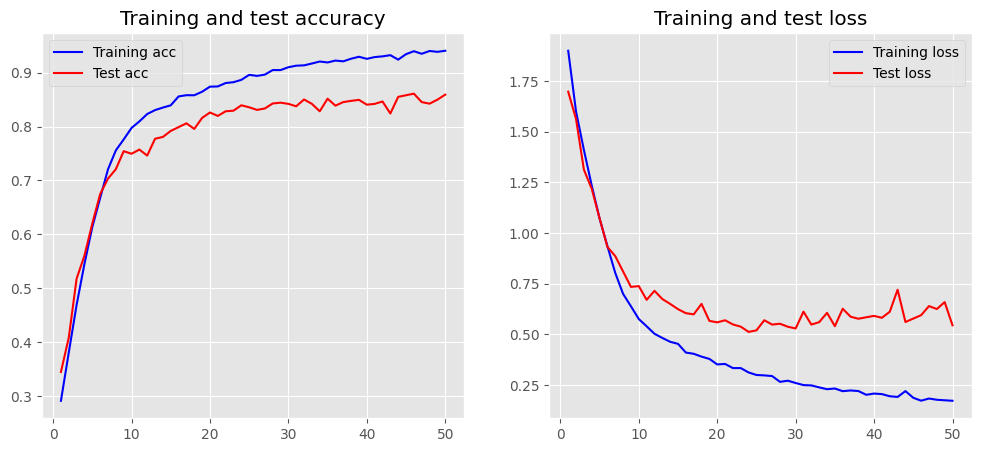

In [24]:
plot_history(h1)

In [27]:
accuracy_score('model1_chkpnt_20221129/simple_dnn_model_final_model')

85/85 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.8498
train accuracy : 0.9585966467857361 | valid accuracy : 0.8591077923774719 | test accuracy : 0.8498141169548035


Building the model2 same as model1 for higher epochs

In [28]:
# Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2]), name='theme_in')

# Audio layer
audio_flat = Flatten()(audio_in) 
audio_dense1 = Dense(256, activation='relu')(audio_flat)
audio_dense2 = Dense(128, activation='relu')(audio_dense1)
audio_dense3 = Dense(64, activation='relu')(audio_dense2)


# Theme layer
theme_flat = Flatten()(theme_in)
theme_dense1 = Dense(64, activation='relu')(theme_flat)

# Concatenate
concat = concatenate([audio_dense3, theme_dense1])
dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(128, activation='relu')(dense1)
dense3 = Dense(64, activation='relu')(dense2)
dense4 = Dense(32, activation='relu')(dense3)
dense5 = Dense(16, activation='relu')(dense4)
op = Dense(7, activation='softmax',name='op')(dense5)


model2 = Model(inputs=[audio_in, theme_in], outputs=[op])

model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 250, 15)]    0           []                               
                                                                                                  
 flatten_4 (Flatten)            (None, 3750)         0           ['audio_in[0][0]']               
                                                                                                  
 dense_18 (Dense)               (None, 256)          960256      ['flatten_4[0][0]']              
                                                                                                  
 theme_in (InputLayer)          [(None, 250, 5)]     0           []                               
                                                                                            

Training the earlier model for 200 epochs shows clear signs of overfitting with training accuracy reach ~98% but the validation accuracy remaining at ~86%

In [29]:
# Split DNN model with flatten in the beginning and no regularization/dropout

model2.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )

checkpoint_filepath = './model2_chkpnt_20221129/Split_DNN_model2_checkpoint_{epoch:03d}-{val_accuracy:.2f}'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

h2 = model2.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=200, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}),
            callbacks=[model_checkpoint_callback])


model2.save('./model2_chkpnt_20221129/simple_dnn_model_v2_higher_epochs')


Epoch 1/200
671/673 [============================>.] - ETA: 0s - loss: 1.8093 - accuracy: 0.3224

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_001-0.37/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_001-0.37/assets


673/673 [==============================] - 9s 11ms/step - loss: 1.8089 - accuracy: 0.3226 - val_loss: 1.6544 - val_accuracy: 0.3732
Epoch 2/200
672/673 [============================>.] - ETA: 0s - loss: 1.5269 - accuracy: 0.4255

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_002-0.48/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_002-0.48/assets


673/673 [==============================] - 7s 10ms/step - loss: 1.5271 - accuracy: 0.4254 - val_loss: 1.4370 - val_accuracy: 0.4762
Epoch 3/200
668/673 [============================>.] - ETA: 0s - loss: 1.3176 - accuracy: 0.5152

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_003-0.55/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_003-0.55/assets


673/673 [==============================] - 7s 10ms/step - loss: 1.3163 - accuracy: 0.5157 - val_loss: 1.2392 - val_accuracy: 0.5539
Epoch 4/200
669/673 [============================>.] - ETA: 0s - loss: 1.1058 - accuracy: 0.6046

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_004-0.61/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_004-0.61/assets


673/673 [==============================] - 7s 10ms/step - loss: 1.1052 - accuracy: 0.6051 - val_loss: 1.1137 - val_accuracy: 0.6056
Epoch 5/200
668/673 [============================>.] - ETA: 0s - loss: 0.9400 - accuracy: 0.6725

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_005-0.65/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_005-0.65/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.9394 - accuracy: 0.6728 - val_loss: 1.0140 - val_accuracy: 0.6480
Epoch 6/200
671/673 [============================>.] - ETA: 0s - loss: 0.8121 - accuracy: 0.7196

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_006-0.70/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_006-0.70/assets


673/673 [==============================] - 8s 12ms/step - loss: 0.8115 - accuracy: 0.7199 - val_loss: 0.8651 - val_accuracy: 0.7000
Epoch 7/200
668/673 [============================>.] - ETA: 0s - loss: 0.7272 - accuracy: 0.7490

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_007-0.72/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_007-0.72/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.7278 - accuracy: 0.7488 - val_loss: 0.8233 - val_accuracy: 0.7216
Epoch 8/200
670/673 [============================>.] - ETA: 0s - loss: 0.6670 - accuracy: 0.7709

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_008-0.75/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_008-0.75/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.6659 - accuracy: 0.7714 - val_loss: 0.7495 - val_accuracy: 0.7487
Epoch 9/200
673/673 [==============================] - 6s 8ms/step - loss: 0.6074 - accuracy: 0.7889 - val_loss: 0.7326 - val_accuracy: 0.7468
Epoch 10/200
673/673 [==============================] - 6s 8ms/step - loss: 0.5658 - accuracy: 0.8042 - val_loss: 0.7656 - val_accuracy: 0.7454
Epoch 11/200
670/673 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.8137

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_011-0.79/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_011-0.79/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.5321 - accuracy: 0.8139 - val_loss: 0.6344 - val_accuracy: 0.7896
Epoch 12/200
673/673 [==============================] - 6s 8ms/step - loss: 0.4946 - accuracy: 0.8242 - val_loss: 0.6398 - val_accuracy: 0.7851
Epoch 13/200
667/673 [============================>.] - ETA: 0s - loss: 0.4621 - accuracy: 0.8387

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_013-0.81/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_013-0.81/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.4621 - accuracy: 0.8387 - val_loss: 0.5770 - val_accuracy: 0.8056
Epoch 14/200
673/673 [==============================] - 6s 8ms/step - loss: 0.4376 - accuracy: 0.8444 - val_loss: 0.6235 - val_accuracy: 0.7978
Epoch 15/200
673/673 [==============================] - 5s 8ms/step - loss: 0.4183 - accuracy: 0.8534 - val_loss: 0.6913 - val_accuracy: 0.7766
Epoch 16/200
673/673 [==============================] - 6s 8ms/step - loss: 0.4002 - accuracy: 0.8604 - val_loss: 0.6110 - val_accuracy: 0.7922
Epoch 17/200
668/673 [============================>.] - ETA: 0s - loss: 0.3823 - accuracy: 0.8659

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_017-0.81/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_017-0.81/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.3823 - accuracy: 0.8659 - val_loss: 0.6198 - val_accuracy: 0.8086
Epoch 18/200
668/673 [============================>.] - ETA: 0s - loss: 0.3637 - accuracy: 0.8703

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_018-0.81/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_018-0.81/assets


673/673 [==============================] - 7s 11ms/step - loss: 0.3636 - accuracy: 0.8703 - val_loss: 0.5755 - val_accuracy: 0.8119
Epoch 19/200
669/673 [============================>.] - ETA: 0s - loss: 0.3240 - accuracy: 0.8858

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_019-0.82/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_019-0.82/assets


673/673 [==============================] - 7s 11ms/step - loss: 0.3245 - accuracy: 0.8856 - val_loss: 0.5450 - val_accuracy: 0.8197
Epoch 20/200
673/673 [==============================] - 6s 9ms/step - loss: 0.3290 - accuracy: 0.8844 - val_loss: 0.5630 - val_accuracy: 0.8167
Epoch 21/200
670/673 [============================>.] - ETA: 0s - loss: 0.3058 - accuracy: 0.8939

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_021-0.83/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_021-0.83/assets


673/673 [==============================] - 7s 11ms/step - loss: 0.3059 - accuracy: 0.8938 - val_loss: 0.5411 - val_accuracy: 0.8268
Epoch 22/200
673/673 [==============================] - 6s 9ms/step - loss: 0.3043 - accuracy: 0.8924 - val_loss: 0.6330 - val_accuracy: 0.8082
Epoch 23/200
671/673 [============================>.] - ETA: 0s - loss: 0.2945 - accuracy: 0.8937

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_023-0.84/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_023-0.84/assets


673/673 [==============================] - 7s 11ms/step - loss: 0.2947 - accuracy: 0.8937 - val_loss: 0.5398 - val_accuracy: 0.8390
Epoch 24/200
673/673 [==============================] - 6s 9ms/step - loss: 0.2719 - accuracy: 0.9041 - val_loss: 0.5405 - val_accuracy: 0.8353
Epoch 25/200
673/673 [==============================] - 6s 9ms/step - loss: 0.2733 - accuracy: 0.9044 - val_loss: 0.5166 - val_accuracy: 0.8335
Epoch 26/200
673/673 [==============================] - 6s 9ms/step - loss: 0.2460 - accuracy: 0.9128 - val_loss: 0.5592 - val_accuracy: 0.8249
Epoch 27/200
673/673 [==============================] - 6s 9ms/step - loss: 0.2428 - accuracy: 0.9138 - val_loss: 0.5761 - val_accuracy: 0.8283
Epoch 28/200
667/673 [============================>.] - ETA: 0s - loss: 0.2422 - accuracy: 0.9153

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_028-0.84/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_028-0.84/assets


673/673 [==============================] - 7s 11ms/step - loss: 0.2419 - accuracy: 0.9155 - val_loss: 0.5370 - val_accuracy: 0.8420
Epoch 29/200
673/673 [==============================] - 6s 9ms/step - loss: 0.2377 - accuracy: 0.9156 - val_loss: 0.5279 - val_accuracy: 0.8372
Epoch 30/200
673/673 [==============================] - ETA: 0s - loss: 0.2271 - accuracy: 0.9203

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_030-0.85/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_030-0.85/assets


673/673 [==============================] - 8s 12ms/step - loss: 0.2271 - accuracy: 0.9203 - val_loss: 0.5099 - val_accuracy: 0.8498
Epoch 31/200
672/673 [============================>.] - ETA: 0s - loss: 0.2208 - accuracy: 0.9241

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_031-0.85/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_031-0.85/assets


673/673 [==============================] - 7s 11ms/step - loss: 0.2208 - accuracy: 0.9241 - val_loss: 0.5435 - val_accuracy: 0.8502
Epoch 32/200
673/673 [==============================] - 6s 9ms/step - loss: 0.2180 - accuracy: 0.9246 - val_loss: 0.5891 - val_accuracy: 0.8301
Epoch 33/200
672/673 [============================>.] - ETA: 0s - loss: 0.2180 - accuracy: 0.9237

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_033-0.85/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_033-0.85/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.2179 - accuracy: 0.9237 - val_loss: 0.5092 - val_accuracy: 0.8528
Epoch 34/200
673/673 [==============================] - 6s 8ms/step - loss: 0.2032 - accuracy: 0.9288 - val_loss: 0.5205 - val_accuracy: 0.8517
Epoch 35/200
673/673 [==============================] - 6s 8ms/step - loss: 0.2146 - accuracy: 0.9241 - val_loss: 0.5466 - val_accuracy: 0.8480
Epoch 36/200
670/673 [============================>.] - ETA: 0s - loss: 0.1900 - accuracy: 0.9346

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_036-0.85/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_036-0.85/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.1899 - accuracy: 0.9345 - val_loss: 0.5234 - val_accuracy: 0.8535
Epoch 37/200
673/673 [==============================] - 6s 8ms/step - loss: 0.1917 - accuracy: 0.9333 - val_loss: 0.5327 - val_accuracy: 0.8517
Epoch 38/200
673/673 [==============================] - 6s 8ms/step - loss: 0.1808 - accuracy: 0.9346 - val_loss: 0.5451 - val_accuracy: 0.8528
Epoch 39/200
673/673 [==============================] - 6s 8ms/step - loss: 0.1805 - accuracy: 0.9368 - val_loss: 0.5447 - val_accuracy: 0.8457
Epoch 40/200
673/673 [==============================] - ETA: 0s - loss: 0.1794 - accuracy: 0.9371

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_040-0.86/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_040-0.86/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.1794 - accuracy: 0.9371 - val_loss: 0.5020 - val_accuracy: 0.8636
Epoch 41/200
673/673 [==============================] - 6s 8ms/step - loss: 0.1616 - accuracy: 0.9438 - val_loss: 0.5446 - val_accuracy: 0.8524
Epoch 42/200
673/673 [==============================] - 6s 8ms/step - loss: 0.1611 - accuracy: 0.9453 - val_loss: 0.5471 - val_accuracy: 0.8532
Epoch 43/200
673/673 [==============================] - 5s 8ms/step - loss: 0.1808 - accuracy: 0.9373 - val_loss: 0.5389 - val_accuracy: 0.8572
Epoch 44/200
669/673 [============================>.] - ETA: 0s - loss: 0.1563 - accuracy: 0.9473

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_044-0.87/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_044-0.87/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.1565 - accuracy: 0.9472 - val_loss: 0.4982 - val_accuracy: 0.8665
Epoch 45/200
673/673 [==============================] - 5s 8ms/step - loss: 0.1541 - accuracy: 0.9485 - val_loss: 0.5609 - val_accuracy: 0.8591
Epoch 46/200
673/673 [==============================] - 6s 8ms/step - loss: 0.1545 - accuracy: 0.9481 - val_loss: 0.5546 - val_accuracy: 0.8602
Epoch 47/200
673/673 [==============================] - 6s 8ms/step - loss: 0.1579 - accuracy: 0.9462 - val_loss: 0.5463 - val_accuracy: 0.8558
Epoch 48/200
670/673 [============================>.] - ETA: 0s - loss: 0.1395 - accuracy: 0.9534

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_048-0.87/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_048-0.87/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.1396 - accuracy: 0.9533 - val_loss: 0.5548 - val_accuracy: 0.8691
Epoch 49/200
673/673 [==============================] - 6s 9ms/step - loss: 0.1484 - accuracy: 0.9494 - val_loss: 0.5548 - val_accuracy: 0.8569
Epoch 50/200
673/673 [==============================] - 5s 8ms/step - loss: 0.1414 - accuracy: 0.9521 - val_loss: 0.5116 - val_accuracy: 0.8651
Epoch 51/200
673/673 [==============================] - 6s 8ms/step - loss: 0.1517 - accuracy: 0.9477 - val_loss: 0.5306 - val_accuracy: 0.8599
Epoch 52/200
673/673 [==============================] - 6s 8ms/step - loss: 0.1413 - accuracy: 0.9521 - val_loss: 0.5736 - val_accuracy: 0.8587
Epoch 53/200
673/673 [==============================] - 6s 8ms/step - loss: 0.1360 - accuracy: 0.9555 - val_loss: 0.5489 - val_accuracy: 0.8654
Epoch 54/200
673/673 [==============================] - 6s 8ms/step - loss: 0.1175 - accuracy: 0.9586 - val_loss: 0.5785 - val_accuracy: 0.8651
Epoc

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_062-0.87/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_062-0.87/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.1091 - accuracy: 0.9626 - val_loss: 0.5331 - val_accuracy: 0.8703
Epoch 63/200
673/673 [==============================] - 6s 8ms/step - loss: 0.1197 - accuracy: 0.9613 - val_loss: 0.6406 - val_accuracy: 0.8517
Epoch 64/200
673/673 [==============================] - 5s 8ms/step - loss: 0.1054 - accuracy: 0.9651 - val_loss: 0.6193 - val_accuracy: 0.8565
Epoch 65/200
673/673 [==============================] - 5s 8ms/step - loss: 0.1197 - accuracy: 0.9602 - val_loss: 0.6094 - val_accuracy: 0.8647
Epoch 66/200
673/673 [==============================] - 5s 8ms/step - loss: 0.1113 - accuracy: 0.9631 - val_loss: 0.5878 - val_accuracy: 0.8643
Epoch 67/200
670/673 [============================>.] - ETA: 0s - loss: 0.1034 - accuracy: 0.9652

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_067-0.88/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_067-0.88/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.1036 - accuracy: 0.9651 - val_loss: 0.5509 - val_accuracy: 0.8758
Epoch 68/200
673/673 [==============================] - 6s 8ms/step - loss: 0.1110 - accuracy: 0.9638 - val_loss: 0.6116 - val_accuracy: 0.8665
Epoch 69/200
673/673 [==============================] - 5s 8ms/step - loss: 0.1045 - accuracy: 0.9653 - val_loss: 0.6356 - val_accuracy: 0.8580
Epoch 70/200
673/673 [==============================] - 6s 8ms/step - loss: 0.1025 - accuracy: 0.9650 - val_loss: 0.6344 - val_accuracy: 0.8628
Epoch 71/200
673/673 [==============================] - 5s 8ms/step - loss: 0.1186 - accuracy: 0.9622 - val_loss: 0.6960 - val_accuracy: 0.8535
Epoch 72/200
673/673 [==============================] - 5s 8ms/step - loss: 0.0958 - accuracy: 0.9684 - val_loss: 0.5602 - val_accuracy: 0.8717
Epoch 73/200
673/673 [==============================] - 6s 8ms/step - loss: 0.0890 - accuracy: 0.9719 - val_loss: 0.6351 - val_accuracy: 0.8554
Epoc

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_113-0.88/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_113-0.88/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.0609 - accuracy: 0.9815 - val_loss: 0.6159 - val_accuracy: 0.8799
Epoch 114/200
673/673 [==============================] - 6s 8ms/step - loss: 0.0648 - accuracy: 0.9796 - val_loss: 0.7000 - val_accuracy: 0.8617
Epoch 115/200
673/673 [==============================] - 6s 8ms/step - loss: 0.0651 - accuracy: 0.9802 - val_loss: 0.6780 - val_accuracy: 0.8651
Epoch 116/200
673/673 [==============================] - 5s 8ms/step - loss: 0.0717 - accuracy: 0.9789 - val_loss: 0.6235 - val_accuracy: 0.8658
Epoch 117/200
673/673 [==============================] - 6s 8ms/step - loss: 0.0760 - accuracy: 0.9765 - val_loss: 0.6517 - val_accuracy: 0.8710
Epoch 118/200
673/673 [==============================] - 6s 8ms/step - loss: 0.0637 - accuracy: 0.9798 - val_loss: 0.6600 - val_accuracy: 0.8792
Epoch 119/200
673/673 [==============================] - 6s 8ms/step - loss: 0.0696 - accuracy: 0.9786 - val_loss: 0.6572 - val_accuracy: 0.868

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_133-0.88/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_133-0.88/assets


673/673 [==============================] - 8s 11ms/step - loss: 0.0496 - accuracy: 0.9851 - val_loss: 0.6763 - val_accuracy: 0.8818
Epoch 134/200
673/673 [==============================] - 5s 8ms/step - loss: 0.0592 - accuracy: 0.9817 - val_loss: 0.7239 - val_accuracy: 0.8762
Epoch 135/200
673/673 [==============================] - 6s 8ms/step - loss: 0.0571 - accuracy: 0.9836 - val_loss: 0.7425 - val_accuracy: 0.8628
Epoch 136/200
673/673 [==============================] - 6s 8ms/step - loss: 0.0687 - accuracy: 0.9794 - val_loss: 0.6883 - val_accuracy: 0.8576
Epoch 137/200
673/673 [==============================] - 6s 8ms/step - loss: 0.0590 - accuracy: 0.9830 - val_loss: 0.7038 - val_accuracy: 0.8784
Epoch 138/200
673/673 [==============================] - 6s 8ms/step - loss: 0.0689 - accuracy: 0.9806 - val_loss: 0.6003 - val_accuracy: 0.8710
Epoch 139/200
673/673 [==============================] - 6s 8ms/step - loss: 0.0548 - accuracy: 0.9831 - val_loss: 0.6614 - val_accuracy: 0.870

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_149-0.88/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/Split_DNN_model2_checkpoint_149-0.88/assets


673/673 [==============================] - 7s 10ms/step - loss: 0.0625 - accuracy: 0.9815 - val_loss: 0.6603 - val_accuracy: 0.8825
Epoch 150/200
673/673 [==============================] - 6s 9ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.7384 - val_accuracy: 0.8691
Epoch 151/200
673/673 [==============================] - 6s 9ms/step - loss: 0.0673 - accuracy: 0.9803 - val_loss: 0.6288 - val_accuracy: 0.8691
Epoch 152/200
673/673 [==============================] - 6s 9ms/step - loss: 0.0609 - accuracy: 0.9817 - val_loss: 0.6418 - val_accuracy: 0.8747
Epoch 153/200
673/673 [==============================] - 6s 9ms/step - loss: 0.0513 - accuracy: 0.9862 - val_loss: 0.6996 - val_accuracy: 0.8680
Epoch 154/200
673/673 [==============================] - 6s 9ms/step - loss: 0.0621 - accuracy: 0.9811 - val_loss: 0.6551 - val_accuracy: 0.8732
Epoch 155/200
673/673 [==============================] - 6s 9ms/step - loss: 0.0576 - accuracy: 0.9826 - val_loss: 0.7792 - val_accuracy: 0.869

INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/simple_dnn_model_v2_higher_epochs/assets


INFO:tensorflow:Assets written to: ./model2_chkpnt_20221129/simple_dnn_model_v2_higher_epochs/assets


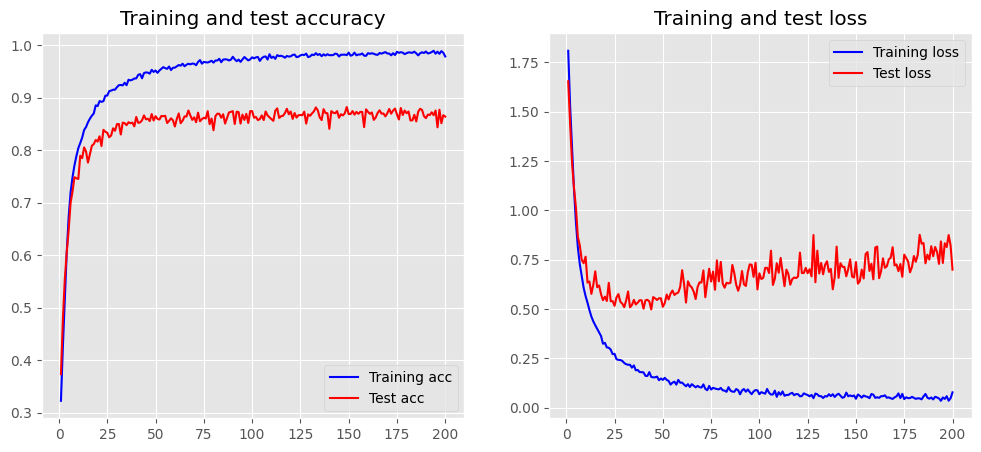

In [30]:
plot_history(h2)

In [31]:
accuracy_score('./model2_chkpnt_20221129/simple_dnn_model_v2_higher_epochs')

85/85 [==============================] - 0s 3ms/step - loss: 0.8013 - accuracy: 0.8535
train accuracy : 0.984944224357605 | valid accuracy : 0.8643122911453247 | test accuracy : 0.8535315990447998


The previous architecture seems to be giving good results in 50 epochs itself. When we train longer for 200 epochs, the model shows signs of overfitting.

In both shorter and longer training models, the validation and test accuracy remains arounds 85% &pm; 1% - 2%

It would be recommended to try similar architecture with some regularization to see if we can cross the 90% validation/test accuracy barrier

Creating the next model with greater height and width and no regularization to see if it yields better results

Increasing dense layer processing for both audio and theme data splits as well as for the concatenated data

In [36]:
# Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2]), name='theme_in')

# Audio layer
audio_flat = Flatten()(audio_in) 
audio_dense1 = Dense(512, activation='relu')(audio_flat)
audio_dense2 = Dense(256, activation='relu')(audio_dense1)
audio_dense3 = Dense(128, activation='relu')(audio_dense2)
audio_dense4 = Dense(64, activation='relu')(audio_dense3)


# Theme layer
theme_flat = Flatten()(theme_in)
theme_dense1 = Dense(128, activation='relu')(theme_flat)
theme_dense2 = Dense(64, activation='relu')(theme_dense1)

# Concatenate
concat = concatenate([audio_dense4, theme_dense2])
dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(128, activation='relu')(dense1)
dense3 = Dense(64, activation='relu')(dense2)
dense4 = Dense(32, activation='relu')(dense3)
dense5 = Dense(16, activation='relu')(dense4)
op = Dense(7, activation='softmax',name='op')(dense5)


model3 = Model(inputs=[audio_in, theme_in], outputs=[op])

model3.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 250, 15)]    0           []                               
                                                                                                  
 flatten_8 (Flatten)            (None, 3750)         0           ['audio_in[0][0]']               
                                                                                                  
 dense_38 (Dense)               (None, 512)          1920512     ['flatten_8[0][0]']              
                                                                                                  
 theme_in (InputLayer)          [(None, 250, 5)]     0           []                               
                                                                                            

Similar to the previous models, we get a model with ~95% test acccuracy and ~86% validation accuracy



In [37]:
# Split DNN model with flatten in the beginning and no regularization/dropout

model3.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )

checkpoint_filepath = './model3_chkpnt_20221129/Split_DNN_model3_checkpoint_{epoch:02d}-{val_accuracy:.2f}'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

h3 = model3.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}),
            callbacks=[model_checkpoint_callback])


model3.save('./model3_chkpnt_20221129/simple_dnn_model_v3_higher_epochs')


Epoch 1/50
673/673 [==============================] - ETA: 0s - loss: 1.7797 - accuracy: 0.3255

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_01-0.43/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_01-0.43/assets


673/673 [==============================] - 14s 18ms/step - loss: 1.7797 - accuracy: 0.3255 - val_loss: 1.5555 - val_accuracy: 0.4279
Epoch 2/50
671/673 [============================>.] - ETA: 0s - loss: 1.4201 - accuracy: 0.4755

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_02-0.52/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_02-0.52/assets


673/673 [==============================] - 12s 18ms/step - loss: 1.4197 - accuracy: 0.4757 - val_loss: 1.3242 - val_accuracy: 0.5201
Epoch 3/50
670/673 [============================>.] - ETA: 0s - loss: 1.1463 - accuracy: 0.5919

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_03-0.62/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_03-0.62/assets


673/673 [==============================] - 13s 19ms/step - loss: 1.1466 - accuracy: 0.5918 - val_loss: 1.0701 - val_accuracy: 0.6186
Epoch 4/50
672/673 [============================>.] - ETA: 0s - loss: 0.9375 - accuracy: 0.6725

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_04-0.69/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_04-0.69/assets


673/673 [==============================] - 12s 18ms/step - loss: 0.9373 - accuracy: 0.6726 - val_loss: 0.8951 - val_accuracy: 0.6941
Epoch 5/50
671/673 [============================>.] - ETA: 0s - loss: 0.7779 - accuracy: 0.7294

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_05-0.71/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_05-0.71/assets


673/673 [==============================] - 12s 18ms/step - loss: 0.7776 - accuracy: 0.7295 - val_loss: 0.8493 - val_accuracy: 0.7108
Epoch 6/50
670/673 [============================>.] - ETA: 0s - loss: 0.6857 - accuracy: 0.7609

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_06-0.74/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_06-0.74/assets


673/673 [==============================] - 12s 18ms/step - loss: 0.6866 - accuracy: 0.7606 - val_loss: 0.7544 - val_accuracy: 0.7428
Epoch 7/50
672/673 [============================>.] - ETA: 0s - loss: 0.6200 - accuracy: 0.7828

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_07-0.76/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_07-0.76/assets


673/673 [==============================] - 12s 18ms/step - loss: 0.6197 - accuracy: 0.7829 - val_loss: 0.6894 - val_accuracy: 0.7595
Epoch 8/50
671/673 [============================>.] - ETA: 0s - loss: 0.5901 - accuracy: 0.7916

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_08-0.77/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_08-0.77/assets


673/673 [==============================] - 12s 18ms/step - loss: 0.5904 - accuracy: 0.7915 - val_loss: 0.6679 - val_accuracy: 0.7677
Epoch 9/50
672/673 [============================>.] - ETA: 0s - loss: 0.5455 - accuracy: 0.8094

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_09-0.78/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_09-0.78/assets


673/673 [==============================] - 12s 17ms/step - loss: 0.5456 - accuracy: 0.8094 - val_loss: 0.6331 - val_accuracy: 0.7833
Epoch 10/50
673/673 [==============================] - 10s 15ms/step - loss: 0.5224 - accuracy: 0.8151 - val_loss: 0.6293 - val_accuracy: 0.7777
Epoch 11/50
673/673 [==============================] - ETA: 0s - loss: 0.4883 - accuracy: 0.8283

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_11-0.79/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_11-0.79/assets


673/673 [==============================] - 12s 17ms/step - loss: 0.4883 - accuracy: 0.8283 - val_loss: 0.6203 - val_accuracy: 0.7903
Epoch 12/50
672/673 [============================>.] - ETA: 0s - loss: 0.4657 - accuracy: 0.8352

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_12-0.80/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_12-0.80/assets


673/673 [==============================] - 12s 17ms/step - loss: 0.4655 - accuracy: 0.8353 - val_loss: 0.6113 - val_accuracy: 0.7981
Epoch 13/50
670/673 [============================>.] - ETA: 0s - loss: 0.4332 - accuracy: 0.8439

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_13-0.80/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_13-0.80/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.4331 - accuracy: 0.8440 - val_loss: 0.5780 - val_accuracy: 0.8030
Epoch 14/50
673/673 [==============================] - ETA: 0s - loss: 0.4211 - accuracy: 0.8511

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_14-0.81/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_14-0.81/assets


673/673 [==============================] - 12s 18ms/step - loss: 0.4211 - accuracy: 0.8511 - val_loss: 0.5678 - val_accuracy: 0.8130
Epoch 15/50
673/673 [==============================] - 10s 15ms/step - loss: 0.4047 - accuracy: 0.8587 - val_loss: 0.5501 - val_accuracy: 0.8123
Epoch 16/50
670/673 [============================>.] - ETA: 0s - loss: 0.3833 - accuracy: 0.8655

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_16-0.81/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_16-0.81/assets


673/673 [==============================] - 12s 18ms/step - loss: 0.3836 - accuracy: 0.8654 - val_loss: 0.5839 - val_accuracy: 0.8134
Epoch 17/50
672/673 [============================>.] - ETA: 0s - loss: 0.3555 - accuracy: 0.8730

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_17-0.82/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_17-0.82/assets


673/673 [==============================] - 12s 18ms/step - loss: 0.3559 - accuracy: 0.8728 - val_loss: 0.5291 - val_accuracy: 0.8212
Epoch 18/50
673/673 [==============================] - 10s 15ms/step - loss: 0.3510 - accuracy: 0.8740 - val_loss: 0.5598 - val_accuracy: 0.8201
Epoch 19/50
673/673 [==============================] - 10s 15ms/step - loss: 0.3331 - accuracy: 0.8808 - val_loss: 0.5804 - val_accuracy: 0.8190
Epoch 20/50
673/673 [==============================] - ETA: 0s - loss: 0.3154 - accuracy: 0.8871

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_20-0.83/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_20-0.83/assets


673/673 [==============================] - 12s 17ms/step - loss: 0.3154 - accuracy: 0.8871 - val_loss: 0.5173 - val_accuracy: 0.8338
Epoch 21/50
673/673 [==============================] - 10s 15ms/step - loss: 0.3226 - accuracy: 0.8833 - val_loss: 0.5780 - val_accuracy: 0.8178
Epoch 22/50
673/673 [==============================] - ETA: 0s - loss: 0.2926 - accuracy: 0.8979

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_22-0.84/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_22-0.84/assets


673/673 [==============================] - 12s 17ms/step - loss: 0.2926 - accuracy: 0.8979 - val_loss: 0.4933 - val_accuracy: 0.8428
Epoch 23/50
673/673 [==============================] - ETA: 0s - loss: 0.2785 - accuracy: 0.9009

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_23-0.85/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_23-0.85/assets


673/673 [==============================] - 12s 18ms/step - loss: 0.2785 - accuracy: 0.9009 - val_loss: 0.5152 - val_accuracy: 0.8457
Epoch 24/50
673/673 [==============================] - 11s 16ms/step - loss: 0.2709 - accuracy: 0.9046 - val_loss: 0.5741 - val_accuracy: 0.8375
Epoch 25/50
673/673 [==============================] - 10s 15ms/step - loss: 0.2739 - accuracy: 0.9035 - val_loss: 0.5189 - val_accuracy: 0.8431
Epoch 26/50
672/673 [============================>.] - ETA: 0s - loss: 0.2527 - accuracy: 0.9125

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_26-0.85/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_26-0.85/assets


673/673 [==============================] - 12s 18ms/step - loss: 0.2527 - accuracy: 0.9125 - val_loss: 0.5325 - val_accuracy: 0.8472
Epoch 27/50
673/673 [==============================] - 10s 15ms/step - loss: 0.2438 - accuracy: 0.9152 - val_loss: 0.5455 - val_accuracy: 0.8323
Epoch 28/50
673/673 [==============================] - 10s 15ms/step - loss: 0.2468 - accuracy: 0.9119 - val_loss: 0.5715 - val_accuracy: 0.8409
Epoch 29/50
671/673 [============================>.] - ETA: 0s - loss: 0.2243 - accuracy: 0.9219

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_29-0.86/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_29-0.86/assets


673/673 [==============================] - 12s 18ms/step - loss: 0.2240 - accuracy: 0.9219 - val_loss: 0.5189 - val_accuracy: 0.8550
Epoch 30/50
673/673 [==============================] - 10s 15ms/step - loss: 0.2275 - accuracy: 0.9199 - val_loss: 0.5179 - val_accuracy: 0.8442
Epoch 31/50
671/673 [============================>.] - ETA: 0s - loss: 0.2262 - accuracy: 0.9198

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_31-0.87/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_31-0.87/assets


673/673 [==============================] - 12s 17ms/step - loss: 0.2260 - accuracy: 0.9199 - val_loss: 0.5056 - val_accuracy: 0.8695
Epoch 32/50
673/673 [==============================] - 10s 16ms/step - loss: 0.1979 - accuracy: 0.9314 - val_loss: 0.5635 - val_accuracy: 0.8509
Epoch 33/50
673/673 [==============================] - 10s 16ms/step - loss: 0.2015 - accuracy: 0.9294 - val_loss: 0.5439 - val_accuracy: 0.8558
Epoch 34/50
673/673 [==============================] - 10s 16ms/step - loss: 0.2056 - accuracy: 0.9291 - val_loss: 0.5077 - val_accuracy: 0.8558
Epoch 35/50
673/673 [==============================] - 10s 15ms/step - loss: 0.1900 - accuracy: 0.9338 - val_loss: 0.5556 - val_accuracy: 0.8595
Epoch 36/50
673/673 [==============================] - 10s 15ms/step - loss: 0.1878 - accuracy: 0.9357 - val_loss: 0.5297 - val_accuracy: 0.8561
Epoch 37/50
673/673 [==============================] - 10s 15ms/step - loss: 0.1821 - accuracy: 0.9368 - val_loss: 0.5599 - val_accuracy: 0.84

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_44-0.87/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_44-0.87/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.1492 - accuracy: 0.9507 - val_loss: 0.5016 - val_accuracy: 0.8714
Epoch 45/50
673/673 [==============================] - 11s 16ms/step - loss: 0.1567 - accuracy: 0.9468 - val_loss: 0.5716 - val_accuracy: 0.8595
Epoch 46/50
673/673 [==============================] - 10s 15ms/step - loss: 0.1554 - accuracy: 0.9486 - val_loss: 0.5263 - val_accuracy: 0.8561
Epoch 47/50
672/673 [============================>.] - ETA: 0s - loss: 0.1631 - accuracy: 0.9462

INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_47-0.87/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/Split_DNN_model3_checkpoint_47-0.87/assets


673/673 [==============================] - 12s 18ms/step - loss: 0.1631 - accuracy: 0.9462 - val_loss: 0.5064 - val_accuracy: 0.8747
Epoch 48/50
673/673 [==============================] - 10s 15ms/step - loss: 0.1385 - accuracy: 0.9526 - val_loss: 0.4988 - val_accuracy: 0.8743
Epoch 49/50
673/673 [==============================] - 10s 15ms/step - loss: 0.1387 - accuracy: 0.9539 - val_loss: 0.5391 - val_accuracy: 0.8729
Epoch 50/50
673/673 [==============================] - 10s 15ms/step - loss: 0.1520 - accuracy: 0.9479 - val_loss: 0.5672 - val_accuracy: 0.8602


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/simple_dnn_model_v3_higher_epochs/assets


INFO:tensorflow:Assets written to: ./model3_chkpnt_20221129/simple_dnn_model_v3_higher_epochs/assets


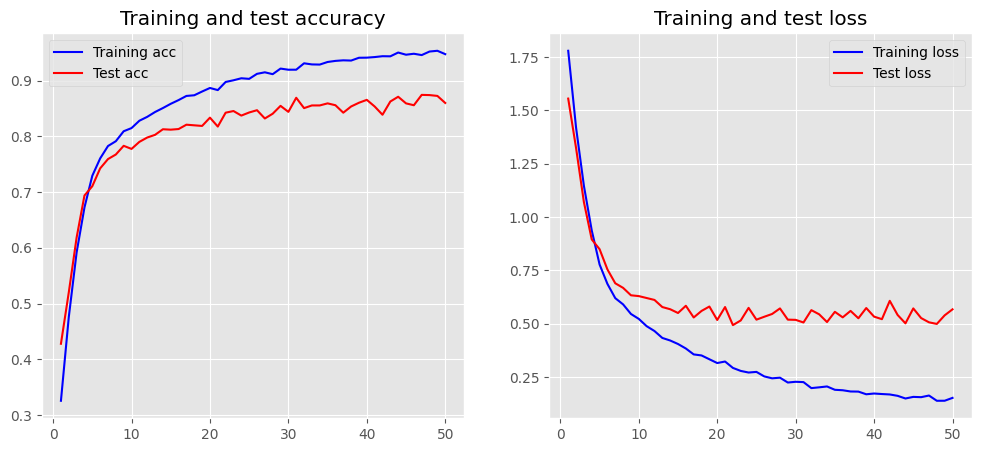

In [38]:
plot_history(h3)

In [39]:
accuracy_score('./model3_chkpnt_20221129/simple_dnn_model_v3_higher_epochs')

85/85 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.8480
train accuracy : 0.9506505727767944 | valid accuracy : 0.8602230548858643 | test accuracy : 0.8479554057121277


Introducing regularization in the 'model3' might help improve the generalization

'model4' - Adding dropouts to 'model3' iteratively to determine the best degree / location of regularization 

It seems that adding regularization to the Audio split or the concatenated split does not drive as much impact as regularization in the Theme split. This was heuristically found out by adding dropout regularization in different data splits

In [16]:
## best model model4 part 4 
## architecture is given below
# Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')
theme_in = Input(shape=(x_train_theme.shape[1], x_train_theme.shape[2]), name='theme_in')

# Audio layer
audio_flat = Flatten()(audio_in) 
audio_dense1 = Dense(512, activation='relu')(audio_flat)
audio_dense2 = Dense(256, activation='relu')(audio_dense1)
audio_dense3 = Dense(128, activation='relu')(audio_dense2)
# audio_dropout = Dropout(0.05)(audio_dense3)
audio_dense4 = Dense(64, activation='relu')(audio_dense3)


# Theme layer
theme_flat = Flatten()(theme_in)
theme_dense1 = Dense(128, activation='relu')(theme_flat)
theme_dropout = Dropout(0.05)(theme_dense1)
theme_dense2 = Dense(64, activation='relu')(theme_dropout)

# Concatenate
concat = concatenate([audio_dense4, theme_dense2])
dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(128, activation='relu')(dense1)
# dropout1 = Dropout(0.1)(dense2)
dense3 = Dense(64, activation='relu')(dense2)
dense4 = Dense(32, activation='relu')(dense3)
dense5 = Dense(16, activation='relu')(dense4)
op = Dense(7, activation='softmax',name='op')(dense5)


model4 = Model(inputs=[audio_in, theme_in], outputs=[op])

model4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 audio_in (InputLayer)          [(None, 250, 15)]    0           []                               
                                                                                                  
 flatten (Flatten)              (None, 3750)         0           ['audio_in[0][0]']               
                                                                                                  
 theme_in (InputLayer)          [(None, 250, 5)]     0           []                               
                                                                                                  
 dense (Dense)                  (None, 512)          1920512     ['flatten[0][0]']                
                                                                                              

The best model performance was found for split DNN with regularization of 0.05 in the Theme split(model4 part 4).

It gives a training, testing and validation accuracy of 98%, 87% and 85% respectively

In [17]:
# Split DNN model with flatten in the beginning and light regularization in theme split

model4.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )

checkpoint_filepath = './model4_chkpnt_20221129/Split_DNN_model4_checkpoint_{epoch:03d}-{val_accuracy:.2f}'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

h4 = model4.fit({'audio_in': x_train_audio, 'theme_in': x_train_theme},{'op': y_train},
              epochs=100, batch_size=32,
            validation_data=({'audio_in': x_test_audio, 'theme_in': x_test_theme},{'op': y_test}),
            callbacks=[model_checkpoint_callback])


model4.save('./model4_chkpnt_20221129/dnn_model_v4_with_dropout_final_model_100epochs')

Epoch 1/100
671/673 [============================>.] - ETA: 0s - loss: 1.7739 - accuracy: 0.3589

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_001-0.45/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_001-0.45/assets


673/673 [==============================] - 16s 21ms/step - loss: 1.7736 - accuracy: 0.3590 - val_loss: 1.4869 - val_accuracy: 0.4476
Epoch 2/100
672/673 [============================>.] - ETA: 0s - loss: 1.3462 - accuracy: 0.5149

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_002-0.59/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_002-0.59/assets


673/673 [==============================] - 13s 20ms/step - loss: 1.3458 - accuracy: 0.5150 - val_loss: 1.1759 - val_accuracy: 0.5914
Epoch 3/100
670/673 [============================>.] - ETA: 0s - loss: 1.0476 - accuracy: 0.6343

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_003-0.66/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_003-0.66/assets


673/673 [==============================] - 13s 19ms/step - loss: 1.0471 - accuracy: 0.6346 - val_loss: 0.9813 - val_accuracy: 0.6617
Epoch 4/100
672/673 [============================>.] - ETA: 0s - loss: 0.8619 - accuracy: 0.7027

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_004-0.69/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_004-0.69/assets


673/673 [==============================] - 12s 19ms/step - loss: 0.8621 - accuracy: 0.7026 - val_loss: 0.8921 - val_accuracy: 0.6941
Epoch 5/100
673/673 [==============================] - ETA: 0s - loss: 0.7328 - accuracy: 0.7461

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_005-0.72/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_005-0.72/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.7328 - accuracy: 0.7461 - val_loss: 0.8205 - val_accuracy: 0.7175
Epoch 6/100
673/673 [==============================] - ETA: 0s - loss: 0.6749 - accuracy: 0.7647

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_006-0.74/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_006-0.74/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.6749 - accuracy: 0.7647 - val_loss: 0.7575 - val_accuracy: 0.7379
Epoch 7/100
671/673 [============================>.] - ETA: 0s - loss: 0.6134 - accuracy: 0.7839

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_007-0.77/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_007-0.77/assets


673/673 [==============================] - 13s 20ms/step - loss: 0.6130 - accuracy: 0.7841 - val_loss: 0.6725 - val_accuracy: 0.7673
Epoch 8/100
671/673 [============================>.] - ETA: 0s - loss: 0.5719 - accuracy: 0.7999

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_008-0.79/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_008-0.79/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.5721 - accuracy: 0.7998 - val_loss: 0.6299 - val_accuracy: 0.7870
Epoch 9/100
673/673 [==============================] - 11s 17ms/step - loss: 0.5514 - accuracy: 0.8026 - val_loss: 0.6342 - val_accuracy: 0.7743
Epoch 10/100
673/673 [==============================] - 11s 17ms/step - loss: 0.5137 - accuracy: 0.8171 - val_loss: 0.6329 - val_accuracy: 0.7840
Epoch 11/100
670/673 [============================>.] - ETA: 0s - loss: 0.5067 - accuracy: 0.8201

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_011-0.79/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_011-0.79/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.5067 - accuracy: 0.8201 - val_loss: 0.5971 - val_accuracy: 0.7907
Epoch 12/100
671/673 [============================>.] - ETA: 0s - loss: 0.4865 - accuracy: 0.8250

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_012-0.80/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_012-0.80/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.4867 - accuracy: 0.8249 - val_loss: 0.5904 - val_accuracy: 0.7981
Epoch 13/100
673/673 [==============================] - 11s 17ms/step - loss: 0.4480 - accuracy: 0.8397 - val_loss: 0.6277 - val_accuracy: 0.7844
Epoch 14/100
670/673 [============================>.] - ETA: 0s - loss: 0.4382 - accuracy: 0.8425

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_014-0.80/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_014-0.80/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.4379 - accuracy: 0.8426 - val_loss: 0.5692 - val_accuracy: 0.8015
Epoch 15/100
670/673 [============================>.] - ETA: 0s - loss: 0.4081 - accuracy: 0.8528

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_015-0.81/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_015-0.81/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.4078 - accuracy: 0.8530 - val_loss: 0.5713 - val_accuracy: 0.8112
Epoch 16/100
673/673 [==============================] - 11s 16ms/step - loss: 0.3947 - accuracy: 0.8566 - val_loss: 0.5870 - val_accuracy: 0.8022
Epoch 17/100
673/673 [==============================] - 11s 16ms/step - loss: 0.3871 - accuracy: 0.8613 - val_loss: 0.5878 - val_accuracy: 0.8033
Epoch 18/100
673/673 [==============================] - 11s 16ms/step - loss: 0.3611 - accuracy: 0.8681 - val_loss: 0.5861 - val_accuracy: 0.8059
Epoch 19/100
670/673 [============================>.] - ETA: 0s - loss: 0.3459 - accuracy: 0.8762

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_019-0.82/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_019-0.82/assets


673/673 [==============================] - 12s 18ms/step - loss: 0.3459 - accuracy: 0.8762 - val_loss: 0.5526 - val_accuracy: 0.8219
Epoch 20/100
673/673 [==============================] - 11s 16ms/step - loss: 0.3522 - accuracy: 0.8720 - val_loss: 0.5836 - val_accuracy: 0.8149
Epoch 21/100
673/673 [==============================] - ETA: 0s - loss: 0.3272 - accuracy: 0.8816

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_021-0.82/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_021-0.82/assets


673/673 [==============================] - 12s 18ms/step - loss: 0.3272 - accuracy: 0.8816 - val_loss: 0.5526 - val_accuracy: 0.8249
Epoch 22/100
670/673 [============================>.] - ETA: 0s - loss: 0.3153 - accuracy: 0.8863

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_022-0.83/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_022-0.83/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.3155 - accuracy: 0.8862 - val_loss: 0.5555 - val_accuracy: 0.8327
Epoch 23/100
671/673 [============================>.] - ETA: 0s - loss: 0.3037 - accuracy: 0.8914

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_023-0.84/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_023-0.84/assets


673/673 [==============================] - 13s 20ms/step - loss: 0.3037 - accuracy: 0.8913 - val_loss: 0.5178 - val_accuracy: 0.8390
Epoch 24/100
673/673 [==============================] - 11s 17ms/step - loss: 0.3056 - accuracy: 0.8885 - val_loss: 0.5241 - val_accuracy: 0.8312
Epoch 25/100
673/673 [==============================] - 11s 17ms/step - loss: 0.2855 - accuracy: 0.8990 - val_loss: 0.5467 - val_accuracy: 0.8357
Epoch 26/100
673/673 [==============================] - 11s 17ms/step - loss: 0.2728 - accuracy: 0.9041 - val_loss: 0.5843 - val_accuracy: 0.8338
Epoch 27/100
673/673 [==============================] - 11s 17ms/step - loss: 0.2623 - accuracy: 0.9056 - val_loss: 0.5327 - val_accuracy: 0.8372
Epoch 28/100
673/673 [==============================] - 11s 17ms/step - loss: 0.2530 - accuracy: 0.9090 - val_loss: 0.5783 - val_accuracy: 0.8368
Epoch 29/100
673/673 [==============================] - 12s 17ms/step - loss: 0.2680 - accuracy: 0.9042 - val_loss: 0.5526 - val_accuracy

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_032-0.85/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_032-0.85/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.2299 - accuracy: 0.9161 - val_loss: 0.5477 - val_accuracy: 0.8483
Epoch 33/100
673/673 [==============================] - 11s 17ms/step - loss: 0.2251 - accuracy: 0.9201 - val_loss: 0.5244 - val_accuracy: 0.8431
Epoch 34/100
673/673 [==============================] - 11s 17ms/step - loss: 0.2222 - accuracy: 0.9203 - val_loss: 0.5403 - val_accuracy: 0.8483
Epoch 35/100
673/673 [==============================] - 11s 17ms/step - loss: 0.2220 - accuracy: 0.9230 - val_loss: 0.5682 - val_accuracy: 0.8472
Epoch 36/100
672/673 [============================>.] - ETA: 0s - loss: 0.2049 - accuracy: 0.9277

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_036-0.85/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_036-0.85/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.2049 - accuracy: 0.9277 - val_loss: 0.5509 - val_accuracy: 0.8494
Epoch 37/100
673/673 [==============================] - 11s 17ms/step - loss: 0.2028 - accuracy: 0.9283 - val_loss: 0.5536 - val_accuracy: 0.8416
Epoch 38/100
673/673 [==============================] - 11s 16ms/step - loss: 0.1944 - accuracy: 0.9303 - val_loss: 0.5523 - val_accuracy: 0.8476
Epoch 39/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1929 - accuracy: 0.9329 - val_loss: 0.5302 - val_accuracy: 0.8468
Epoch 40/100
670/673 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9278

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_040-0.85/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_040-0.85/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.2013 - accuracy: 0.9278 - val_loss: 0.5386 - val_accuracy: 0.8520
Epoch 41/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1956 - accuracy: 0.9316 - val_loss: 0.5911 - val_accuracy: 0.8398
Epoch 42/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1973 - accuracy: 0.9318 - val_loss: 0.5647 - val_accuracy: 0.8483
Epoch 43/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1734 - accuracy: 0.9384 - val_loss: 0.5936 - val_accuracy: 0.8520
Epoch 44/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1775 - accuracy: 0.9384 - val_loss: 0.6303 - val_accuracy: 0.8431
Epoch 45/100
673/673 [==============================] - ETA: 0s - loss: 0.1749 - accuracy: 0.9394

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_045-0.86/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_045-0.86/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.1749 - accuracy: 0.9394 - val_loss: 0.5376 - val_accuracy: 0.8628
Epoch 46/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1767 - accuracy: 0.9388 - val_loss: 0.5602 - val_accuracy: 0.8487
Epoch 47/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1726 - accuracy: 0.9411 - val_loss: 0.5551 - val_accuracy: 0.8625
Epoch 48/100
673/673 [==============================] - 11s 16ms/step - loss: 0.1643 - accuracy: 0.9434 - val_loss: 0.5933 - val_accuracy: 0.8480
Epoch 49/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1568 - accuracy: 0.9444 - val_loss: 0.6336 - val_accuracy: 0.8487
Epoch 50/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1632 - accuracy: 0.9416 - val_loss: 0.6989 - val_accuracy: 0.8498
Epoch 51/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1522 - accuracy: 0.9478 - val_loss: 0.5677 - val_accuracy

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_065-0.86/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_065-0.86/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.1267 - accuracy: 0.9576 - val_loss: 0.5673 - val_accuracy: 0.8639
Epoch 66/100
672/673 [============================>.] - ETA: 0s - loss: 0.1389 - accuracy: 0.9529

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_066-0.87/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_066-0.87/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.1389 - accuracy: 0.9529 - val_loss: 0.5992 - val_accuracy: 0.8654
Epoch 67/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1166 - accuracy: 0.9609 - val_loss: 0.6087 - val_accuracy: 0.8643
Epoch 68/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1307 - accuracy: 0.9566 - val_loss: 0.5606 - val_accuracy: 0.8610
Epoch 69/100
670/673 [============================>.] - ETA: 0s - loss: 0.1077 - accuracy: 0.9646

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_069-0.87/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_069-0.87/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.1075 - accuracy: 0.9647 - val_loss: 0.6320 - val_accuracy: 0.8662
Epoch 70/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1170 - accuracy: 0.9621 - val_loss: 0.5944 - val_accuracy: 0.8602
Epoch 71/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1276 - accuracy: 0.9582 - val_loss: 0.6255 - val_accuracy: 0.8465
Epoch 72/100
671/673 [============================>.] - ETA: 0s - loss: 0.1170 - accuracy: 0.9601

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_072-0.87/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_072-0.87/assets


673/673 [==============================] - 14s 20ms/step - loss: 0.1173 - accuracy: 0.9600 - val_loss: 0.5783 - val_accuracy: 0.8665
Epoch 73/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1256 - accuracy: 0.9594 - val_loss: 0.5909 - val_accuracy: 0.8639
Epoch 74/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1257 - accuracy: 0.9591 - val_loss: 0.6458 - val_accuracy: 0.8584
Epoch 75/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1082 - accuracy: 0.9629 - val_loss: 0.6328 - val_accuracy: 0.8647
Epoch 76/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1094 - accuracy: 0.9633 - val_loss: 0.6688 - val_accuracy: 0.8543
Epoch 77/100
673/673 [==============================] - 11s 16ms/step - loss: 0.1088 - accuracy: 0.9655 - val_loss: 0.5907 - val_accuracy: 0.8599
Epoch 78/100
673/673 [==============================] - ETA: 0s - loss: 0.0972 - accuracy: 0.9682

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_078-0.87/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_078-0.87/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.0972 - accuracy: 0.9682 - val_loss: 0.6085 - val_accuracy: 0.8680
Epoch 79/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1141 - accuracy: 0.9636 - val_loss: 0.6266 - val_accuracy: 0.8602
Epoch 80/100
673/673 [==============================] - ETA: 0s - loss: 0.1035 - accuracy: 0.9664

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_080-0.87/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_080-0.87/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.1035 - accuracy: 0.9664 - val_loss: 0.6347 - val_accuracy: 0.8714
Epoch 81/100
673/673 [==============================] - 11s 17ms/step - loss: 0.0959 - accuracy: 0.9692 - val_loss: 0.7212 - val_accuracy: 0.8606
Epoch 82/100
673/673 [==============================] - 11s 16ms/step - loss: 0.1202 - accuracy: 0.9610 - val_loss: 0.6615 - val_accuracy: 0.8632
Epoch 83/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1054 - accuracy: 0.9670 - val_loss: 0.6500 - val_accuracy: 0.8535
Epoch 84/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1063 - accuracy: 0.9656 - val_loss: 0.6315 - val_accuracy: 0.8662
Epoch 85/100
673/673 [==============================] - 11s 16ms/step - loss: 0.0932 - accuracy: 0.9703 - val_loss: 0.6720 - val_accuracy: 0.8599
Epoch 86/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1048 - accuracy: 0.9648 - val_loss: 0.6414 - val_accuracy

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_089-0.87/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_089-0.87/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.0864 - accuracy: 0.9709 - val_loss: 0.6078 - val_accuracy: 0.8725
Epoch 90/100
673/673 [==============================] - 11s 16ms/step - loss: 0.0894 - accuracy: 0.9711 - val_loss: 0.6617 - val_accuracy: 0.8628
Epoch 91/100
673/673 [==============================] - 11s 16ms/step - loss: 0.1074 - accuracy: 0.9671 - val_loss: 0.6168 - val_accuracy: 0.8639
Epoch 92/100
673/673 [==============================] - 11s 17ms/step - loss: 0.0907 - accuracy: 0.9710 - val_loss: 0.7322 - val_accuracy: 0.8613
Epoch 93/100
673/673 [==============================] - ETA: 0s - loss: 0.0888 - accuracy: 0.9718

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_093-0.87/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_093-0.87/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.0888 - accuracy: 0.9718 - val_loss: 0.6251 - val_accuracy: 0.8729
Epoch 94/100
673/673 [==============================] - 11s 17ms/step - loss: 0.0785 - accuracy: 0.9749 - val_loss: 0.6659 - val_accuracy: 0.8651
Epoch 95/100
673/673 [==============================] - 11s 17ms/step - loss: 0.1065 - accuracy: 0.9671 - val_loss: 0.6130 - val_accuracy: 0.8621
Epoch 96/100
673/673 [==============================] - 11s 16ms/step - loss: 0.0879 - accuracy: 0.9731 - val_loss: 0.6935 - val_accuracy: 0.8680
Epoch 97/100
673/673 [==============================] - 11s 16ms/step - loss: 0.1027 - accuracy: 0.9687 - val_loss: 0.6473 - val_accuracy: 0.8691
Epoch 98/100
673/673 [==============================] - 11s 17ms/step - loss: 0.0975 - accuracy: 0.9710 - val_loss: 0.6313 - val_accuracy: 0.8710
Epoch 99/100
673/673 [==============================] - 11s 16ms/step - loss: 0.0851 - accuracy: 0.9729 - val_loss: 0.6216 - val_accuracy

INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_100-0.88/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/Split_DNN_model4_checkpoint_100-0.88/assets


673/673 [==============================] - 13s 19ms/step - loss: 0.0772 - accuracy: 0.9746 - val_loss: 0.6656 - val_accuracy: 0.8755


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/dnn_model_v4_with_dropout_final_model_100epochs/assets


INFO:tensorflow:Assets written to: ./model4_chkpnt_20221129/dnn_model_v4_with_dropout_final_model_100epochs/assets


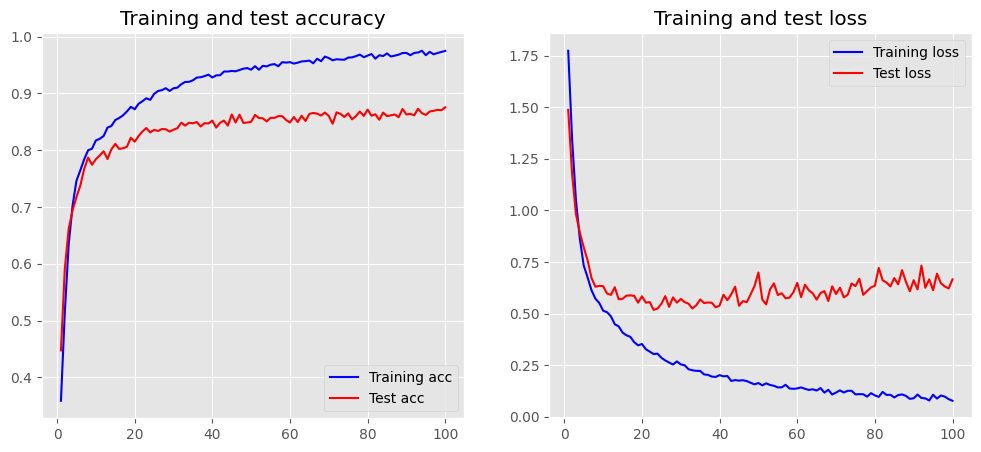

In [18]:
plot_history(h4)

In [19]:
accuracy_score('./model4_chkpnt_20221129/dnn_model_v4_with_dropout_final_model_100epochs')

85/85 [==============================] - 0s 4ms/step - loss: 0.7895 - accuracy: 0.8580
train accuracy : 0.9864776730537415 | valid accuracy : 0.875464677810669 | test accuracy : 0.8579925894737244


Best model


The best architecture for split DNN is model 4 given below-

Audio Split - 1 Flatten layer, 4 dense layers and no regularization

Theme Split - 1 Flatten layer, 2 dense layer with dropout regularization of 0.05

Concatenated split - 1 concatenated layer, 4 dense layers and regularization 

It yields training, testing and validation accuracy of 98%, 87% and 85% respectively